<p style="font-size:32px;text-align:center;color: blue;"> <b>Flight Fare Prediction</b> </p>

<table>
<tr> 
<td><img src="flight.jpg", width=500, height=300></td>
</tr>
</table>

### <span style="color: blue;">***Problem statement :***</span>

#### ***To predict flight fare charges of various airlines***

### <span style="color: blue;">***Data Overview :***</span>

- Downloaded the dataset from https://www.kaggle.com/nikhilmittal/filght-fare-prediction-mh
- train.xlsx

### <span style="color: blue;">***Problem type :***</span>

    - Regression Problem

#### Importing required packages

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# ___Performing on Train data file___

# <span style="color: blue;">[1] Overview of Data :</span>

In [102]:
#Loading the excel file
train_data = pd.read_excel("Data_Train.xlsx")

In [103]:
# Check the rows and columns
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [104]:
# Dimensions of the dataframe
train_data.shape

(10683, 11)

In [105]:
# Columns in dataframe
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [106]:
# Information of our dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# <span style="color: blue;">[2] Data Cleaning :</span>

In [107]:
# Checking the null/missing values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### We are removing the null/ missing values because the values are comparitivly negligible

In [108]:
# Removing the null/ missing values
train_data.dropna(inplace=True)

In [109]:
# checking the null values after removal
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [110]:
# Check the shape of dataframe after removing missing values
train_data.shape

(10682, 11)

#### We removed 1 row related to missing/ null values

### Removing the unwanted/ unrelated features

In [111]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [112]:
# Checking top 2 rows after removal of unrelated features
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662


# <span style="color: blue;">[3] EDA :</span>

Num of Airline :  12
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:>

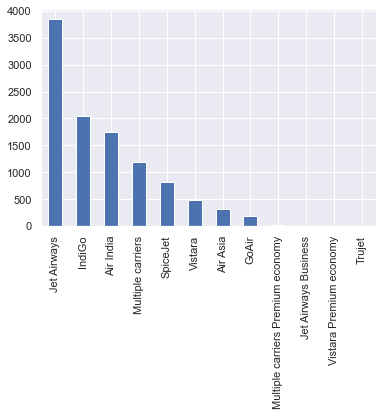

In [113]:
# Check the unique Airline  in dataset
print('Num of Airline : ',len(train_data.Airline.value_counts()))
print(train_data.Airline.value_counts())
train_data.Airline.value_counts().plot.bar()

#### Airlines Analysis
There are 12 airlines groups.
- Majority flights operating are - JetAirways, Indigo, AirAsia
- Least flights operating are - Trujet, Vistara, JetAirways Bussiness class.

Num of destination points:  6

Info of destination points:  Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:>

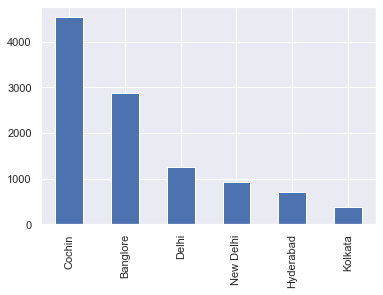

In [114]:
# Check the unique destination points in dataset
print('Num of destination points: ',len(train_data.Destination.value_counts()))
print('\nInfo of destination points: ',train_data.Destination.value_counts())
train_data.Destination.value_counts().plot.bar()

#### Destination Analysis
1. There are 6 destinations for all airlines are operating.
- Most flights are fly to Cochin and Bangalore.
- Less flights are fly to Kolkata.

Num of Source points:  5

Info of Source points:  Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:>

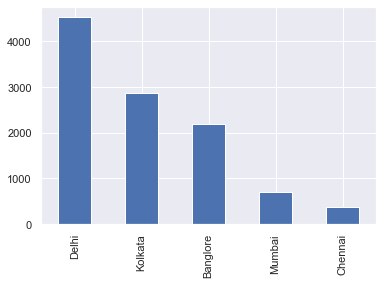

In [115]:
# Check the unique Source points in dataset
print('Num of Source points: ',len(train_data.Source.value_counts()))
print('\nInfo of Source points: ',train_data.Source.value_counts())
train_data.Source.value_counts().plot.bar()

#### Source Analysis
1. There are 5 source for all airlines are operating.
- Most flights are fly from Delhi, Kolkata and Bangalore.
- Less flights are fly from Chennai.

In [116]:
# Data analysing on ground_truth 'Price'
train_data.Price.describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

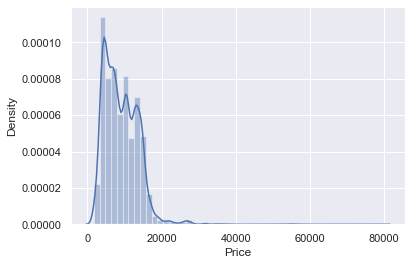

In [117]:
sns.set()
sns.distplot(train_data['Price'])

#### Price Analysis
- Minimum fare to travel in airlines is Rs. ~1.8k 
- Average fare to travel in airlines is Rs. ~6k to 16K 
- Maximum fare to travel in airlines is Rs. ~80k 

<AxesSubplot:>

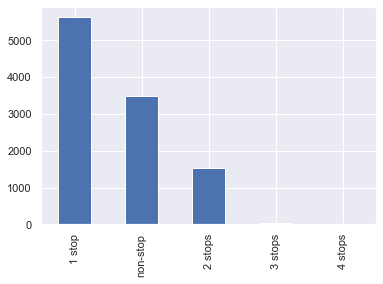

In [118]:
train_data.Total_Stops.value_counts().plot.bar()

#### No. of stops :
- Maximum stops : 4
- Minimum stops : 0 (Non stop)
- Average stops : 1

### Change the data format from string to int in Date_of_Journey feature
Execute in separate columns because fight ticket fare is depends on months of festivals, weekend days.

In [119]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day
train_data['Journey_month']= pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month

In [120]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5


In [121]:
# Since we are converted Date_jouney column into int from string, so removing that feature no use 
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

### Change the standard time format in Dep_Time

In [122]:
# Extracting in hours
train_data['Dep_hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour

# Extracting in minutes
train_data['Dep_min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

# Drop the 'Dep_Time' feature as it is no use
train_data.drop(['Dep_Time'], axis=1, inplace=True)

In [123]:
train_data.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50


### Changing standard time format in Arrival_Time feature

In [124]:
# Extracting in hours
train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting in minutes
train_data['Arrival_minute'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Drop the 'Dep_Time' feature as it is no use
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [125]:
train_data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15


> $Travel Duration = (Departure time-Arrival time)$
- Time taken by flight to reach destination point called Duration

In [126]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [127]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [128]:
# Drop the Duration feature 
train_data.drop(["Duration"], axis = 1, inplace = True)

In [129]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


## [3.1] Relation between Price and other Features

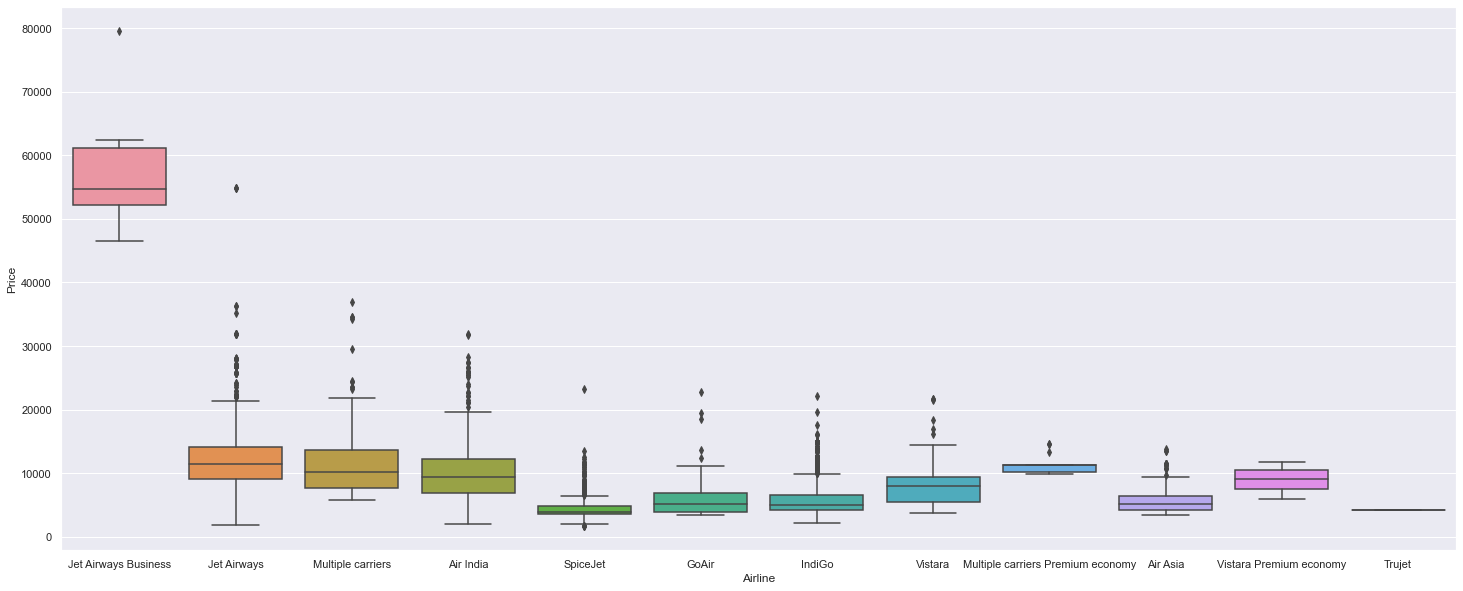

In [130]:
# Airline vs Price
plt.figure(figsize=(25,10))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price',ascending=False))
plt.show()

- From graph we can see that Jet Airways Business have the highest Price.
- Apart from the first Airline almost all are having similar median

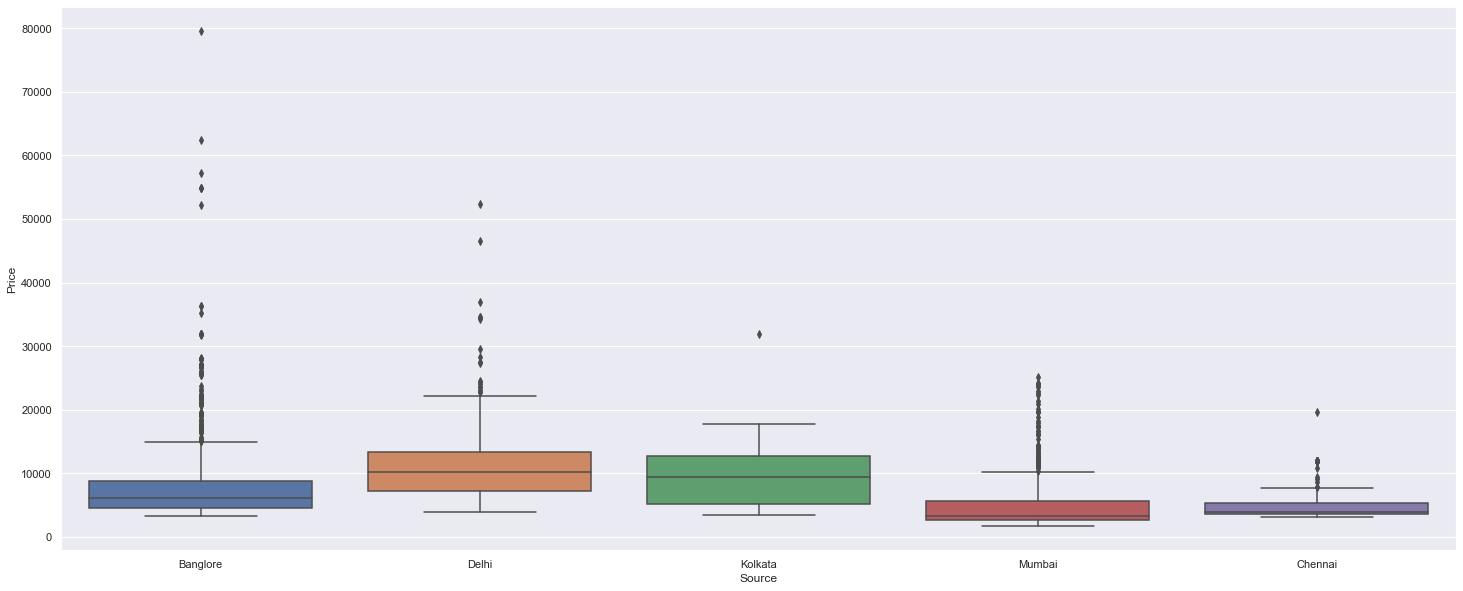

In [131]:
# Source vs Price
plt.figure(figsize=(25,10))
sns.boxplot(x='Source', y='Price', data=train_data.sort_values('Price',ascending=False))
plt.show()

- From graph we can see that high fare to travel from Delhi to other cites.
- A very affordable fare to travel from Chennai to other cites.

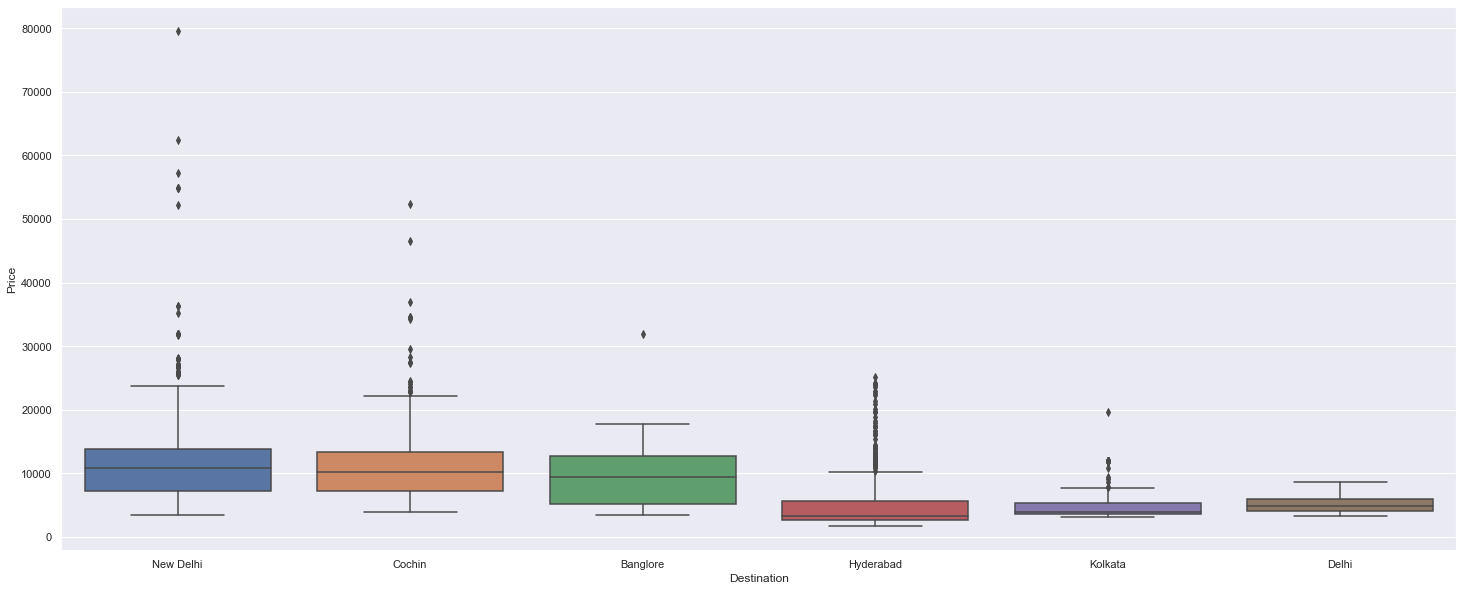

In [132]:
# Destination vs Price
plt.figure(figsize=(25,10))
sns.boxplot(x='Destination', y='Price', data=train_data.sort_values('Price',ascending=False))
plt.show()

- Highest fare to tarvel Delhi and Cochin.
- To travel Kolkata and Hyderabad is very affordable compares to other cites.

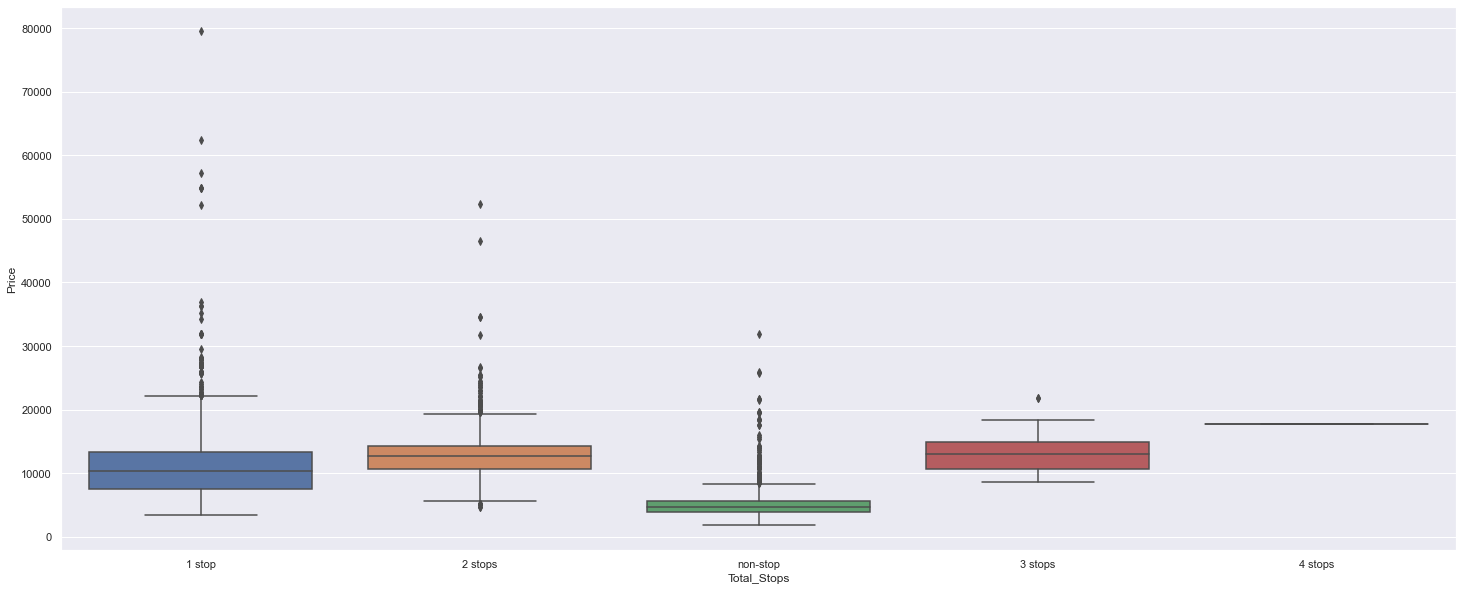

In [133]:
# Total_Stops vs Price
plt.figure(figsize=(25,10))
sns.boxplot(x='Total_Stops', y='Price', data=train_data.sort_values('Price',ascending=False))
plt.show()

- Single stop flights are high fares.

#  <span style="color: blue;">[4] Data Pre-processing & Feature Engineering</span>

## [4.1] Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [134]:
train_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0


In [135]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [136]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Source.head(2)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0


In [137]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [138]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [139]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)
data_train.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0


In [140]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head(3)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0


In [141]:
data_train.shape

(10682, 30)

___In kaggle the dataset is divided in two files Train.csv and Test.csv, we should not merge the datasets in one file because DATA LEAKAGE will happen. When we merge the datsets into single dataset, Test data will know the Train data. This causes the Overfitting the model by bad performance model score. Hence kaggle will given the two separate datasets to required good model.___

## [4.2] Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**SelectKBest**</span>

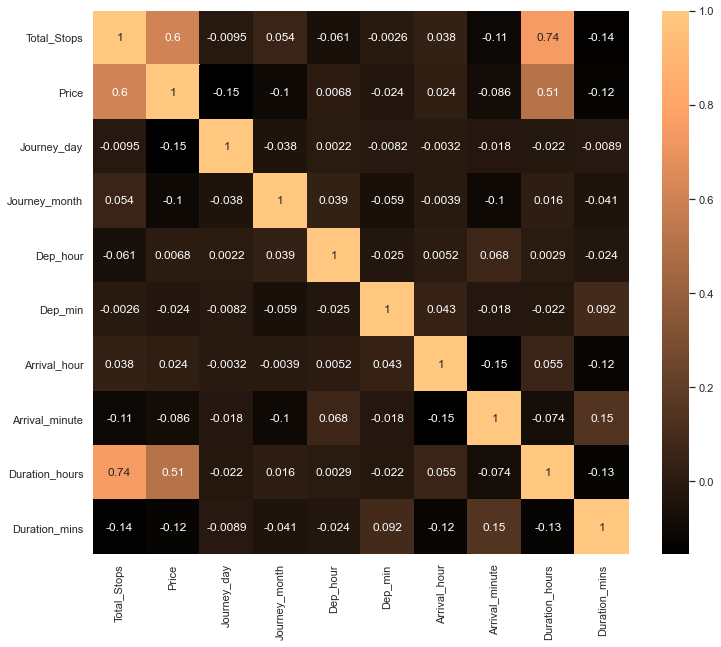

In [142]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (12,10))
sns.heatmap(train_data.corr(), annot = True, cmap = "copper")
plt.show()

## [4.3] Spilliting the data into Train & Test (80:20)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X = data_train.drop(['Price'], axis=1)
y = data_train['Price']

In [145]:
print(X.shape, Y.shape)

(10682, 29) (10682,)


In [146]:
Y.head(3)

0     3897
1     7662
2    13882
Name: Price, dtype: int64

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [148]:
print(X_train.shape, X_test.shape)

(8545, 29) (2137, 29)


#  <span style="color: blue;">[5] Modelling</span>

<table>
<tr> 
<td><img src="flightglobe.jpg", width=300, height=300></td>
</tr>
</table>

In [195]:
########################################################
######## IMPORTING NECESSARY MODULES AND MODELS ########
########################################################

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

#from sklearn.grid_search import GridSearchCV

## [5.1] Linear Regression Model

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [151]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, Y_train)

LinearRegression()

In [152]:
Y_pred = lr_reg.predict(X_test)

#### Model score for train & test set

In [154]:
lr_reg.score(X_train, Y_train)

0.6240840020468166

In [155]:
lr_reg.score(X_test, Y_test)

0.61959437290701

#### R2 score

In [157]:
metrics.r2_score(Y_test, Y_pred)

0.61959437290701

In [158]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 1972.9372855148056
MSE: 8202327.557407134
RMSE: 2863.9705929717807


### Implementing multiple models

In [160]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

#pipelines.append(
#                ("Scaled_ADA-Reg",
#                 Pipeline([
#                     ("Scaler", StandardScaler()),
#                     ("ADA-reg", AdaBoostRegressor())
#                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    

Scaled_Ridge: 0.620128 (+/- 0.030416)
Scaled_Lasso: 0.603839 (+/- 0.032396)
Scaled_Elastic: 0.581701 (+/- 0.030559)
Scaled_SVR: 0.596124 (+/- 0.029545)
Scaled_RF_reg: 0.799356 (+/- 0.017499)
Scaled_ET_reg: 0.776484 (+/- 0.015264)
Scaled_BR_reg: 0.783647 (+/- 0.015726)
Scaled_Hub-Reg: 0.608898 (+/- 0.031084)
Scaled_BayRidge: 0.620126 (+/- 0.030531)
Scaled_XGB_reg: 0.827854 (+/- 0.025359)
Scaled_DT_reg: 0.676234 (+/- 0.046811)
Scaled_KNN_reg: 0.728563 (+/- 0.030938)
Scaled_Gboost-Reg: 0.763277 (+/- 0.026074)
Scaled_RFR_PCA: 0.580853 (+/- 0.048361)
Scaled_XGBR_PCA: 0.540750 (+/- 0.062924)


## [5.2] Testing the best models

### [5.2.1] XGBRegressor

In [182]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

In [183]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
y_hat = xgb.predict(X_test)

In [185]:
xgb.score(X_test, Y_test)

0.8437056182495588

___Excellent result of XGB Regressor with some arbitrary params.___

___Now, let's explore the Random Search in RandomForest Regressor___

### [5.2.2] Randominzed Search in RandomForest Regressor

- first I will set the params grid to use on Randomized Search

In [186]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

### Using Random Search to find the best Hyper Paramns

In [187]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42, verbose=2)

In [188]:
#Knowning the best params
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [189]:
# Predicting with best params
y_hat_Search = rf_random.predict(X_test)

In [191]:
rf_random.score(X_test, Y_test)

0.8100326322703956

### Printing the difference between the 2 best models scores

In [196]:
print("XGBoost Regressor R2-score: {}".format(round(r2_score(y_hat, Y_test),4)))
print("RandomForest Regressor Prediction R2-score: {}".format(round(r2_score(y_hat_Search, Y_test),4)))
print("\nMSE of XGBoost Regressor: {}".format(median_absolute_error(y_hat, Y_test)))
print("MSE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, Y_test)))

XGBoost Regressor R2-score: 0.8057
RandomForest Regressor Prediction R2-score: 0.7725

MSE of XGBoost Regressor: 848.43603515625
MSE of RandomForest Regressor: 668.6067936507934 


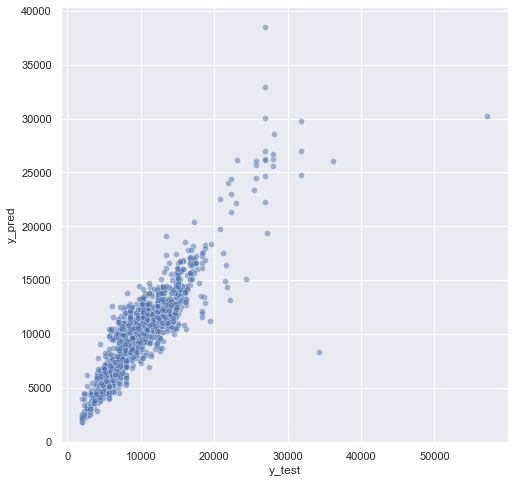

In [206]:
plt.figure(figsize = (8,8))
sns.scatterplot(Y_test, y_hat, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()